Usando o exemplo 51

In [62]:
#instalando bibilioteca pandas
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install nltk
%pip install lime

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
#importando pacotes e bibliotecas para um SVM

import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
#from sklearn.feature_extraction.text import CountVectorizer #converter os textos em uma matriz
from sklearn.feature_extraction.text import TfidfTransformer #frequencia que o termo aparece

#from sklearn.svm import LinearSVC, SVC # dados lineares / não lineares

In [64]:
#importando dataset

df = pd.read_csv("../spam.csv")

In [65]:
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [66]:
df.shape

(5572, 2)

<Axes: xlabel='Category', ylabel='count'>

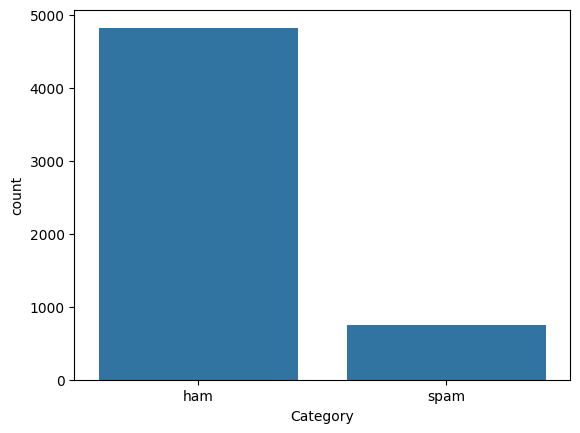

In [67]:
#exibindo os dados em um gráfico de barras
sns.countplot(x='Category', data=df)

**Pré-processamento**

In [68]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


# Baixar pacotes necessários do NLTK
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
#nltk.download('punkt_tab') # Download the 'punkt_tab' resource

[nltk_data] Downloading package stopwords to C:\Users\LUIRYS
[nltk_data]     SILVA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\LUIRYS
[nltk_data]     SILVA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\LUIRYS
[nltk_data]     SILVA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [69]:
def preprocess_text(text):
    # Converter para minúsculas
    text = text.lower()

    # Remover caracteres especiais e números
    text = re.sub(r"[^a-zA-Z\s]", "", text)

    # Tokenização (dividir em palavras)
    tokens = word_tokenize(text)

    # Remover stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]

    # Lematização (reduzir palavras à sua forma base)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Juntar as palavras processadas de volta em uma string
    return " ".join(tokens)

In [70]:
df["clean_text"] = df["Message"].apply(preprocess_text)

In [71]:
df.head(5)

,Category,Message,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though


<Axes: xlabel='Category', ylabel='count'>

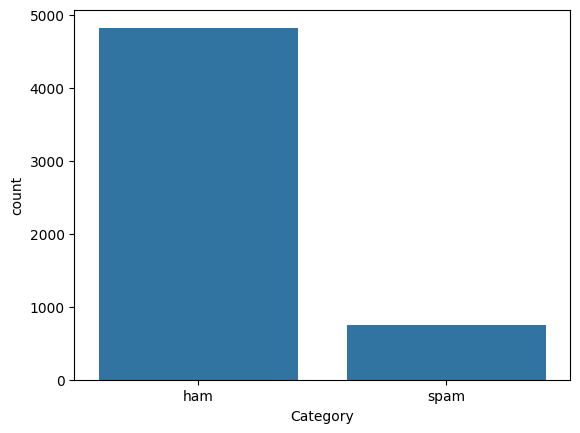

In [72]:
sns.countplot(x="Category", data=df) # validando se mudou as classes

TREINAMENTO

In [73]:
# Assuming 'text' is the column name containing the text data and 'sentiment' is the target column
X = df['Message']
y = df['Category']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["Category"], test_size=0.2, random_state=42)

In [75]:
# Import necessary libraries for the pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC

# Define and fit the pipeline
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ('vect', CountVectorizer()),  # Convert text to numerical features
    ('tfidf', TfidfTransformer()),  # Apply TF-IDF transformation
    ('clf', LinearSVC()),  # Use a LinearSVC classifier (you can change this to another classifier)
])
pipeline.fit(X_train, y_train)  # Train the pipeline on the training data

,steps,"[('vect', ...), ('tfidf', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [76]:
#exibindo 5 dados de teste
print(X_test.head(101))

3245    squeeeeeze christmas hug u lik frndshp den hug...
944     also ive sorta blown couple time recently id r...
1044    mmm thats better got roast id b better drink g...
2484                  mm kanji dont eat anything heavy ok
812     there ring come guy costume gift future yowife...
                              ...                        
4707    wow healthy old airport rd lor cant thk anythi...
2658                                  dai ltgt naal eruku
3479                       ask around there lot term mids
4483        u reckon need arrange transport u cant thanks
4700                                             yes fine
Name: clean_text, Length: 101, dtype: object


In [ ]:
#mostrando exemplos da classe spam e mostrando seu contador no inicio

print(X_test[y_test == 'spam'].head(5))

401     free ringtone text first poly text get true to...
5567    nd time tried contact u u pound prize claim ea...
881     reminder downloaded content already paid goto ...
1961    guess somebody know secretly fancy wan na find...
2664    free st week nokia tone ur mob every week txt ...
Name: clean_text, dtype: object


**LIME**

In [97]:
from IPython.display import display
from lime.lime_text import LimeTextExplainer

# Criando o explainer
explainer = LimeTextExplainer(class_names=list(pipeline.classes_))


def predict_proba(texts):
    # LIME espera probabilidades, mas LinearSVC não tem predict_proba.
    # Usamos decision_function e normalizamos para somar 1 (softmax-like).
    scores = pipeline.decision_function(texts)
    import numpy as np
    # Se for 1D (binary), transforma em 2D
    if len(scores.shape) == 1:
        scores = np.vstack([-scores, scores]).T
    # Softmax para converter scores em "probabilidades"
    exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))
    probs = exp_scores / exp_scores.sum(axis=1, keepdims=True)
    return probs

# Solicita ao usuário o número da linha do exemplo
idx = int(input(f"Digite o número da linha (0 a {len(X_test)-1}): "))
sample_text = X_test.iloc[idx]
sample_label = y_test.iloc[idx]

# Predição da classe para o texto selecionado
pred_class_name = pipeline.predict([sample_text])[0]

print(f"Número da linha no X_test: {idx}")
print(f"Original text:\n{sample_text}")
print(f"Real class: {sample_label}")
print(f"Classe predita: {pred_class_name}")

explanation = explainer.explain_instance(
    sample_text,
    predict_proba,
    num_features=10
)

Número da linha no X_test: 51
Original text:
free st week nokia tone ur mob every week txt nokia get txting tell ur mate wwwgetzedcouk pobox w wq norm ptone
Real class: spam
Classe predita: spam


In [99]:
# Obtém as palavras mais importantes e seus pesos
lime_features = explanation.as_list()

# Exibe cada palavra com seu impacto na predição
print("Palavras mais importantes e seus pesos:")
for word, weight in lime_features:
    print(f"{word}: {weight:.4f}")


Palavras mais importantes e seus pesos:
txt: 0.1409
tone: 0.1098
nokia: 0.0958
pobox: 0.0945
mob: 0.0624
free: 0.0583
norm: -0.0372
get: -0.0344
ptone: -0.0322
st: 0.0318


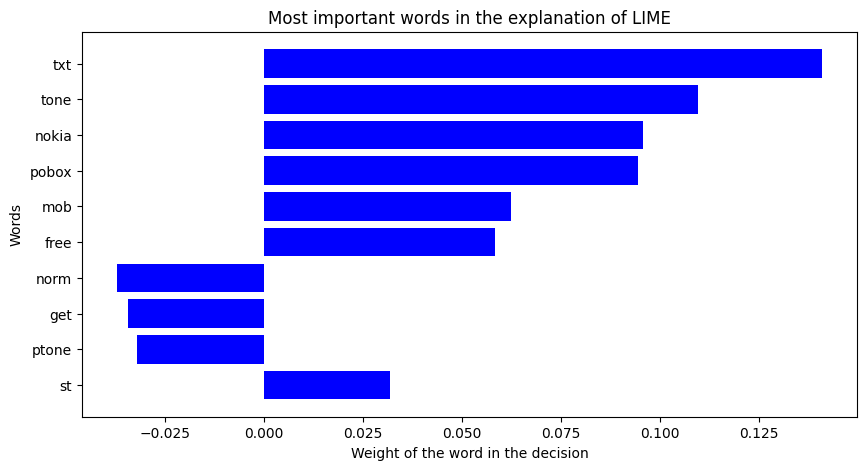

In [100]:
# Separar palavras e pesos
words, weights = zip(*lime_features)

# Criar gráfico de barras
plt.figure(figsize=(10, 5))
plt.barh(words, weights, color="blue")
plt.xlabel("Weight of the word in the decision")
plt.ylabel("Words")
plt.title("Most important words in the explanation of LIME")
plt.gca().invert_yaxis()  # Inverter para mostrar a palavra mais importante no topo
plt.show()

In [101]:
explanation_list = explanation.as_list()
lime_df = pd.DataFrame(explanation_list, columns=["Words", "Impact"])

# Ordenar por impacto
lime_df = lime_df.sort_values(by="Impact", ascending=False)

display(lime_df.head(20))  # Exibir as 20 palavras mais impactantes

,Words,Impact
0,txt,0.140936
1,tone,0.109755
2,nokia,0.095777
3,pobox,0.094488
4,mob,0.062441
5,free,0.058346
9,st,0.031826
8,ptone,-0.032208
7,get,-0.034375
6,norm,-0.037198


**Métricas**

In [102]:
from sklearn.metrics import classification_report

# Predict the labels for the test set
y_pred = pipeline.predict(X_test)

# Generate the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       0.99      0.91      0.94       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



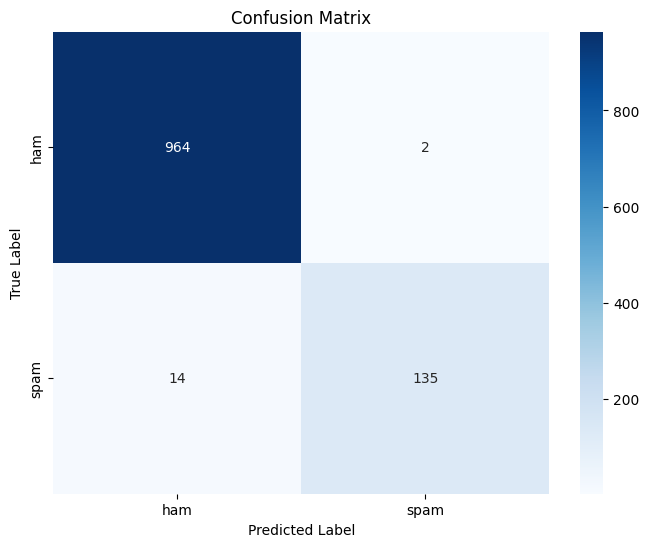

In [103]:
# Calculate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=df["Category"].unique(), yticklabels=df["Category"].unique())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Import necessary metrics

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Usando 'weighted' para classes múltiplas
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Acuraccy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Acuraccy: 0.9857
Precision: 0.9856
Recall: 0.9857
F1-Score: 0.9854


**Attention Vizualization**

A interpretação da atenção no SVM é diferente da interpretação em redes neurais. No SVM, a atenção é representada pela importância das features na decisão do modelo.

In [105]:
print(pipeline.classes_)

['ham' 'spam']


In [ ]:
# Obter os nomes das features do CountVectorizer
#feature_names = pipeline.named_steps['vect'].get_feature_names_out()

# Obter os coeficientes do SVM para a classe prevista
#classe_prevista = pipeline.predict([sample_text])[0]
#classe_idx = list(pipeline.classes_).index(classe_prevista)
#pesos = pipeline.named_steps['clf'].coef_[classe_idx]

# Criar DataFrame com as features e pesos
#importancias = pd.DataFrame({'Feature': feature_names, 'Weight': pesos})

# Marcar as palavras do exemplo
#palavras_exemplo = set(sample_text.split())
#importancias['No_Exemplo'] = importancias['Feature'].apply(lambda x: x in palavras_exemplo)

# Visualizar as palavras do exemplo e seus pesos
#importancias_exemplo = importancias[importancias['No_Exemplo']].sort_values(by='Weight', ascending=False)

#print("Palavras do exemplo e seus pesos na decisão da classe prevista:")
#print(importancias_exemplo[['Feature', 'Weight']])

# Plotar as palavras do exemplo
#plt.figure(figsize=(10, 5))
#plt.barh(importancias_exemplo['Feature'], importancias_exemplo['Weight'], color="red")
#plt.xlabel("Peso da Palavra na decisão")
#plt.ylabel("Palavra")
#plt.title("Palavras do exemplo e sua importância para a classe prevista")
#plt.gca().invert_yaxis()
#plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1

Palavras do exemplo e seus pesos na decisão da classe prevista:
            Feature    Weight
6265            txt  2.300571
6135           tone  1.597641
4496          pobox  1.296867
2154           free  1.191280
4018          nokia  0.991319
3758            mob  0.937653
5625             st  0.622001
6613           week  0.365123
6380             ur  0.301078
1855          every  0.253132
6841  wwwgetzedcouk  0.130123
3583           mate  0.041140
4707          ptone  0.000000
4031           norm -0.011654
6270         txting -0.011969
5927           tell -0.213560
2291            get -0.516431


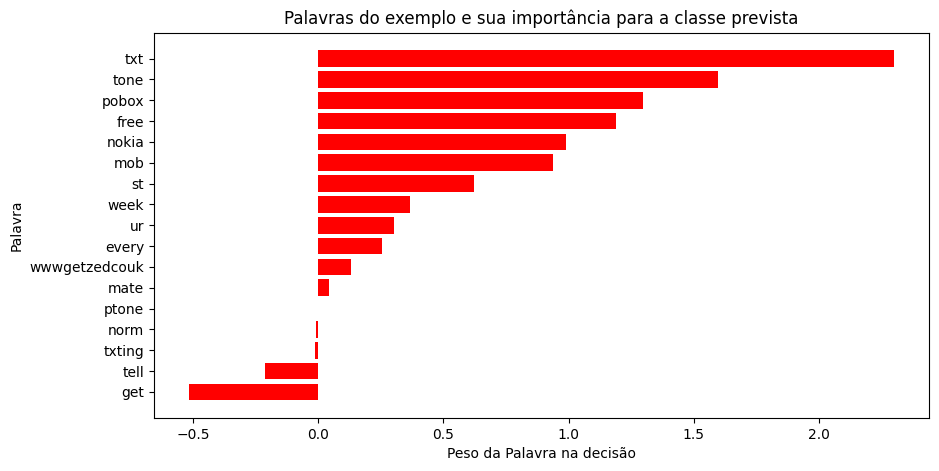

In [109]:
# Obter os nomes das features do CountVectorizer
feature_names = pipeline.named_steps['vect'].get_feature_names_out()

# Obter os coeficientes do SVM para a classe prevista
classe_prevista = pipeline.predict([sample_text])[0]
classe_idx = list(pipeline.classes_).index(classe_prevista)

# Verificar se o modelo tem múltiplas classes ou é binário
if pipeline.named_steps['clf'].coef_.shape[0] == 1:
    # Para classificação binária, usar o primeiro (e único) conjunto de coeficientes
    pesos = pipeline.named_steps['clf'].coef_[0]
else:
    # Para múltiplas classes, usar o índice da classe prevista
    pesos = pipeline.named_steps['clf'].coef_[classe_idx]

# Criar DataFrame com as features e pesos
importancias = pd.DataFrame({'Feature': feature_names, 'Weight': pesos})

# Marcar as palavras do exemplo
palavras_exemplo = set(sample_text.split())
importancias['No_Exemplo'] = importancias['Feature'].apply(lambda x: x in palavras_exemplo)

# Visualizar as palavras do exemplo e seus pesos
importancias_exemplo = importancias[importancias['No_Exemplo']].sort_values(by='Weight', ascending=False)

print("Palavras do exemplo e seus pesos na decisão da classe prevista:")
print(importancias_exemplo[['Feature', 'Weight']])

# Plotar as palavras do exemplo
plt.figure(figsize=(10, 5))
plt.barh(importancias_exemplo['Feature'], importancias_exemplo['Weight'], color="red")
plt.xlabel("Peso da Palavra na decisão")
plt.ylabel("Palavra")
plt.title("Palavras do exemplo e sua importância para a classe prevista")
plt.gca().invert_yaxis()
plt.show()

In [111]:
# Assumindo que 'pipeline' é o pipeline do SVM
pesos = pipeline.named_steps['clf'].coef_[0]  # Obter os pesos do SVM

# Obter os nomes das features
nomes_das_features = pipeline.named_steps['vect'].get_feature_names_out()

# Criar um DataFrame para visualizar os pesos
importancias_das_features = pd.DataFrame({'Feature': nomes_das_features, 'Weight': pesos})
importancias_das_features = importancias_das_features.sort_values(by='Weight', ascending=False)

print(importancias_das_features.head(20))  # Exibir as 20 features mais importantes

           Feature    Weight
6265           txt  2.300571
1051         claim  2.027801
5230       service  1.924486
5686          stop  1.816414
3760        mobile  1.723814
6135          tone  1.597641
4651         prize  1.563511
4931         reply  1.523849
5003      ringtone  1.486823
1286        credit  1.359403
5956          text  1.349414
4496         pobox  1.296867
4487          pmin  1.283646
6383        urgent  1.274439
591            bid  1.259861
6510       voucher  1.257876
5006  ringtoneking  1.256393
5967           tfp  1.256393
6693           win  1.235139
154          alert  1.221872


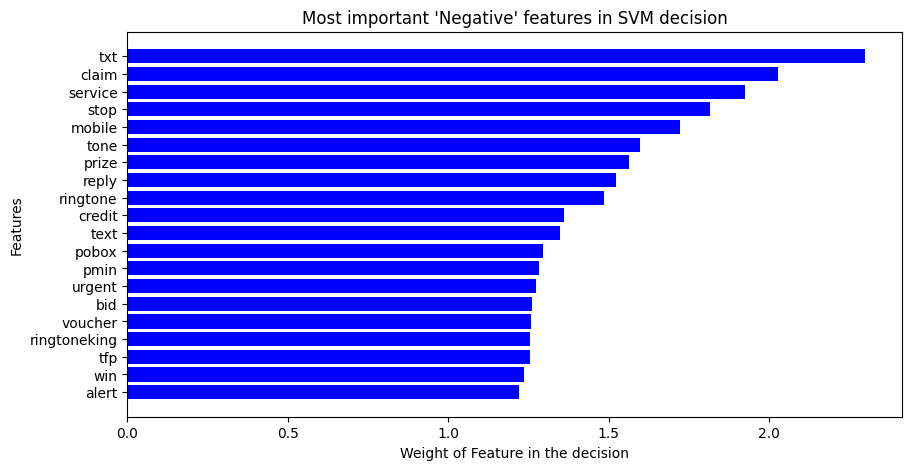

In [112]:
plt.figure(figsize=(10, 5))
plt.barh(importancias_das_features['Feature'][:20], importancias_das_features['Weight'][:20], color="blue")
plt.xlabel("Weight of Feature in the decision")
plt.ylabel("Features")
plt.title("Most important 'Negative' features in SVM decision")
plt.gca().invert_yaxis()  # Inverter para mostrar a feature mais importante no topo
plt.show()

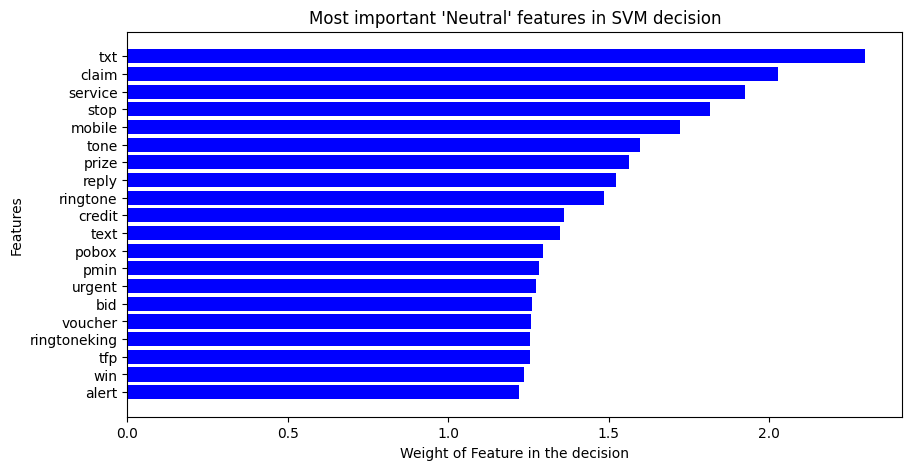

In [113]:
plt.figure(figsize=(10, 5))
plt.barh(importancias_das_features['Feature'][:20], importancias_das_features['Weight'][:20], color="blue")
plt.xlabel("Weight of Feature in the decision")
plt.ylabel("Features")
plt.title("Most important 'Neutral' features in SVM decision")
plt.gca().invert_yaxis()  # Inverter para mostrar a feature mais importante no topo
plt.show()

In [115]:
# Assumindo que 'pipeline' é o pipeline do SVM
pesos = pipeline.named_steps['clf'].coef_[1]  # Obter os pesos do SVM

# Obter os nomes das features
nomes_das_features = pipeline.named_steps['vect'].get_feature_names_out()

# Criar um DataFrame para visualizar os pesos
importancias_das_features = pd.DataFrame({'Feature': nomes_das_features, 'Weight': pesos})
importancias_das_features = importancias_das_features.sort_values(by='Weight', ascending=False)

print(importancias_das_features.head(20))  # Exibir as 20 features mais importantes

IndexError: index 1 is out of bounds for axis 0 with size 1

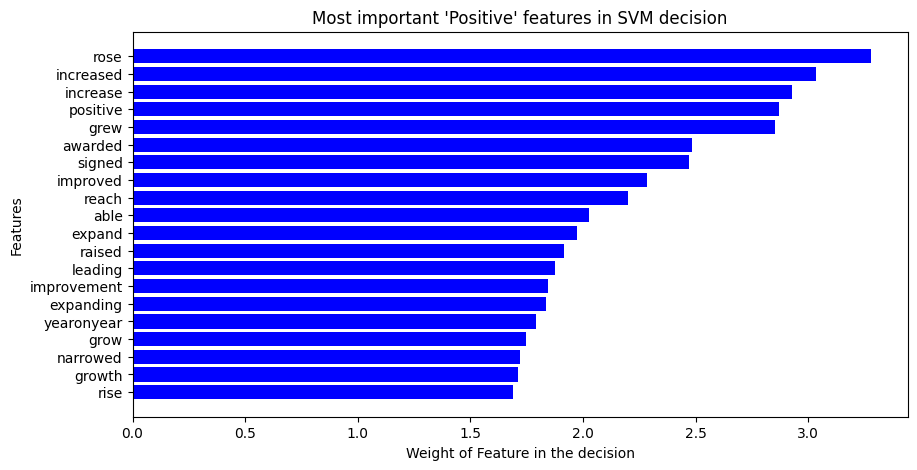

In [ ]:
plt.figure(figsize=(10, 5))
plt.barh(importancias_das_features['Feature'][:20], importancias_das_features['Weight'][:20], color="blue")
plt.xlabel("Weight of Feature in the decision")
plt.ylabel("Features")
plt.title("Most important 'Positive' features in SVM decision")
plt.gca().invert_yaxis()  # Inverter para mostrar a feature mais importante no topo
plt.show()

In [ ]:
# Contar a distribuição das classes em tabela
class_distribution = df['sentiment'].value_counts()
class_distribution2 = pd.Series(y_test).value_counts()

print("Distribuição das classes:")
print(class_distribution)

print("Distribuição das classes no conjunto de teste:")
print(class_distribution2)

Distribuição das classes:
sentiment
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64
Distribuição das classes no conjunto de teste:
sentiment
neutral     571
positive    289
negative    110
Name: count, dtype: int64
